In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('Farm_Weather_Data.csv')

In [3]:
data

,MaxT,MinT,WindSpeed,Humidity,Precipitation
0,29.5,21.8,1.6,70.2,0.0
1,30.1,21.0,1.6,67.4,0.0
2,29.9,21.1,1.7,65.2,0.0
3,29.8,20.8,1.5,69.0,0.0
4,29.6,20.5,2.1,69.5,0.0
...,...,...,...,...,...
6231,34.0,19.0,4.0,63.0,0.0
6232,37.0,19.0,2.9,57.5,0.0
6233,34.0,20.0,2.3,55.0,0.0
6234,38.0,19.0,2.4,54.0,0.0


In [4]:
data.rename(columns={'Humidity ': 'Humidity'}, inplace=True)

In [5]:
features = data[['MaxT', 'MinT', 'WindSpeed', 'Humidity', 'Precipitation']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
scaled_features

array([[-1.17703073, -0.94299536, -1.15400797,  0.27083526, -0.41435692],
       [-0.99339085, -1.19975575, -1.15400797,  0.02327473, -0.41435692],
       [-1.05460415, -1.1676607 , -1.0596278 , -0.17123712, -0.41435692],
       ...,
       [ 0.20026838, -1.52070624, -0.49334677, -1.07306477, -0.41435692],
       [ 1.42453426, -1.84165673, -0.3989666 , -1.16147925, -0.41435692],
       [ 1.11846779, -1.84165673, -0.49334677, -0.89623582, -0.41435692]])

In [7]:
data['WateringNeeded'] = (data['Humidity'] < 50).astype(int)

In [8]:
X = pd.DataFrame(scaled_features, columns=features.columns)
y = data['WateringNeeded']

In [9]:
X

,MaxT,MinT,WindSpeed,Humidity,Precipitation
0,-1.177031,-0.942995,-1.154008,0.270835,-0.414357
1,-0.993391,-1.199756,-1.154008,0.023275,-0.414357
2,-1.054604,-1.167661,-1.059628,-0.171237,-0.414357
3,-1.085211,-1.263946,-1.248388,0.164738,-0.414357
4,-1.146424,-1.360231,-0.682107,0.208945,-0.414357
...,...,...,...,...,...
6231,0.200268,-1.841657,1.111116,-0.365749,-0.414357
6232,1.118468,-1.841657,0.072934,-0.852029,-0.414357
6233,0.200268,-1.520706,-0.493347,-1.073065,-0.414357
6234,1.424534,-1.841657,-0.398967,-1.161479,-0.414357


In [10]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6231    0
6232    0
6233    0
6234    0
6235    0
Name: WateringNeeded, Length: 6236, dtype: int32

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [31]:
import pickle
with open('watering_modelRandomForest.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [21]:
# Load data
data = pd.read_csv('Farm_Weather_Data.csv')

In [22]:
# Display first few rows of the data
data.head()

,MaxT,MinT,WindSpeed,Humidity,Precipitation
0,29.5,21.8,1.6,70.2,0.0
1,30.1,21.0,1.6,67.4,0.0
2,29.9,21.1,1.7,65.2,0.0
3,29.8,20.8,1.5,69.0,0.0
4,29.6,20.5,2.1,69.5,0.0


In [23]:
# Define features and scale them
data.rename(columns={'Humidity ': 'Humidity'}, inplace=True)
features = data[['MaxT', 'MinT', 'WindSpeed', 'Humidity', 'Precipitation']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [24]:
# Define target variable based on humidity threshold
data['WateringNeeded'] = (data['Humidity'] < 50).astype(int)

In [25]:
# Create feature matrix and target vector
X = pd.DataFrame(scaled_features, columns=features.columns)
y = data['WateringNeeded']

In [26]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Initialize and train an SVM classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [28]:
# Predict and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.84%


In [30]:
import pickle
with open('watering_modelSVC.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load and preprocess data
data = pd.read_csv('Farm_Weather_Data.csv')
data.rename(columns={'Humidity ': 'Humidity'}, inplace=True)
features = data[['MaxT', 'MinT', 'WindSpeed', 'Humidity', 'Precipitation']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define target variable
data['WateringNeeded'] = (data['Humidity'] < 50).astype(int)

# Create feature matrix and target vector
X = pd.DataFrame(scaled_features, columns=features.columns)
y = data['WateringNeeded']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train XGBoost classifier
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


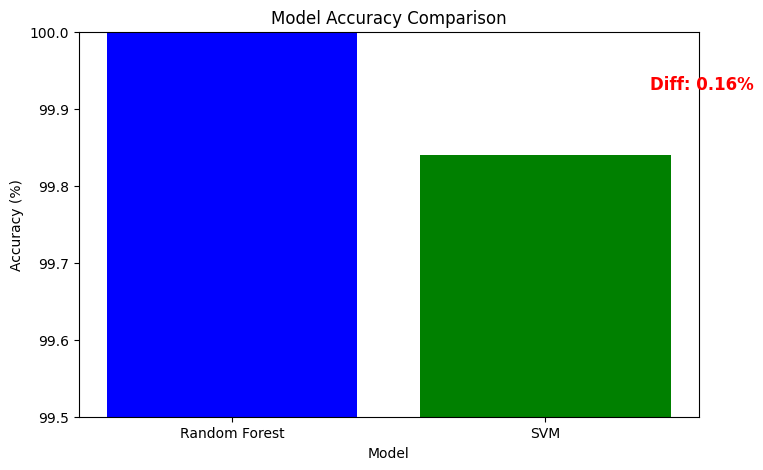

In [34]:
import matplotlib.pyplot as plt

# Define the models and their corresponding accuracies
models = ['Random Forest', 'SVM']
accuracies = [100.00, 99.84]  # Replace these with actual accuracies

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green'])

# Annotate the difference
difference = accuracies[0] - accuracies[1]
plt.text(1.5, (accuracies[0] + accuracies[1]) / 2, f'Diff: {difference:.2f}%',
         ha='center', va='bottom', fontsize=12, color='red', fontweight='bold')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim([99.5, 100])  # Adjusted for better visibility

# Display the chart
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Farm_Weather_Data.csv')

# Rename columns to correct any inconsistencies
data.rename(columns={'Humidity ': 'Humidity'}, inplace=True)

# Define features and target variable
features = data[['MaxT', 'MinT', 'WindSpeed', 'Humidity', 'Precipitation']]
data['WateringNeeded'] = (data['Humidity'] < 50).astype(int)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create feature matrix (X) and target vector (y)
X = pd.DataFrame(scaled_features, columns=features.columns)
y = data['WateringNeeded']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and calculate accuracy for Random Forest
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")

# Initialize and train the Support Vector Classifier
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train, y_train)

# Predict and calculate accuracy for SVC
y_pred_svc = svc_clf.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Model Accuracy: {accuracy_svc * 100:.2f}%")


Random Forest Model Accuracy: 100.00%
SVC Model Accuracy: 99.84%
